In [1]:
###import libraries

import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import deque
import math
import random
import time

In [2]:
###prepare environment

env = gym.make('Pong-v0')
env.reset()

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       [[109, 118,  43],
        [109, 118,  43],
        [109, 118,  43],
        ...,
        [109, 118,  43],
        [109, 118,  43],
        [109, 118,  43]],

       ...,

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]],

       [[ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24],
        ...,
        [ 53,  95,  24],
        [ 53,  95,  24],
        [ 53,  95,  24]]

In [3]:
###understand environment

#action: 2 = up; 3 = down; all other numbers is nothing
#observation: 210 x 160 x 3 (stack of frames)

In [4]:
###visualize environment

for episode in range(3):
    print('Episode', episode+1)
    env.reset()
    while True:
        #env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print('\tObservation:', observation)
        print('\tReward:', reward)
        print('\tDone:', done)
        print('\tInfo:', info, '\n')
        #time.sleep(0.025)
        if done:
            break

env.close()

Episode 1
	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72 

  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: -1.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 1.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  

  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  

  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  

  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]]
	Reward: 0.0
	Done: False
	Info: {'ale.lives': 0} 

	Observation: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  

In [5]:
###create deep learning agent

class DQNAgent:
    def __init__(self, action_size):
        self.action_size = action_size
        self.gamma = 0.99
        self.alpha = 0.00025
        self.learning_starts = 50000
        self.learning_frequency = 4
        self.frame_history_length = 4
        self.target_model_update_frequency = 10000
        self.eps_initial = 1.0
        self.eps_final = 0.1
        self.eps_final_frame = 0.01
        self.eps_annealing_frames = 1000000
        self.max_frames = 25000000
        self.slope = -(self.eps_initial - self.eps_final)/self.eps_annealing_frames
        self.intercept = self.eps_initial - self.slope*self.learning_starts
        self.slope_2 = -(self.eps_final - self.eps_final_frame)/(self.max_frames - self.eps_annealing_frames - self.learning_starts)
        self.intercept_2 = self.eps_final_frame - self.slope_2*self.max_frames
        self.frame_height, self.frame_width = 84, 84
        self.memory = deque(maxlen=1000000)
        self.batch_size = 32
        self.build_model()
    
    def build_model(self):
        with tf.name_scope('inputs'):
            self.tf_observations = tf.placeholder(tf.float32, [None, self.frame_height, self.frame_width, self.frame_history_length], name='observations')
            self.tf_observations /= 255
            self.tf_q_s_a = tf.placeholder(tf.float32, [None, self.action_size], name='q_s_a')
        
        with tf.name_scope('conv1'):
            conv1 = tf.layers.conv2d(self.tf_observations, 
                                     32, 
                                     kernel_size=[8, 8], 
                                     strides=4, 
                                     kernel_initializer=tf.variance_scaling_initializer(scale=2), 
                                     padding='valid', 
                                     activation=tf.nn.relu, 
                                     use_bias=False)
        
        with tf.name_scope('conv2'):
            conv2 = tf.layers.conv2d(conv1, 
                                     64, 
                                     kernel_size=[4, 4], 
                                     strides=2, 
                                     kernel_initializer=tf.variance_scaling_initializer(scale=2), 
                                     padding='valid', 
                                     activation=tf.nn.relu, 
                                     use_bias=False)
            
        with tf.name_scope('conv3'):
            conv3 = tf.layers.conv2d(conv2, 
                                     64, 
                                     kernel_size=[3, 3], 
                                     strides=1, 
                                     kernel_initializer=tf.variance_scaling_initializer(scale=2), 
                                     padding='valid', 
                                     activation=tf.nn.relu, 
                                     use_bias=False)
        
        flattened = tf.layers.flatten(conv3)
        with tf.name_scope('fc1'):
            fc1 = tf.contrib.layers.fully_connected(flattened, 
                                                    512, 
                                                    activation_fn=tf.nn.relu)
        
        with tf.name_scope('logits'):
            self.logits = tf.contrib.layers.fully_connected(fc1, 
                                                            self.action_size, 
                                                            activation_fn=None)
        with tf.name_scope('loss'):
            self.loss = tf.reduce_mean(tf.losses.huber_loss(self.tf_q_s_a, self.logits))
        
        with tf.name_scope('train'):
            self.optimizer = tf.train.AdamOptimizer(self.alpha).minimize(self.loss)
            
    def preprocess(self, observation):
        frame = tf.placeholder(tf.uint8, [210, 160, 3])
        processed = tf.image.rgb_to_grayscale(frame)
        processed = tf.image.crop_to_bounding_box(processed, 34, 0, 160, 160)
        processed = tf.image.resize_images(processed, [self.frame_height, self.frame_width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
#        observation = observation[35:195] #160 x 160 x 3
#        observation = observation[::2, ::2, 0] #80 x 80
#        observation[observation == 144] = 0
#        observation[observation == 109] = 0
#        observation[observation != 0] = 1
#        observation = observation.astype(np.float).ravel()
#        observation = np.reshape(observation, [1, self.observation_size])
        return sess.run(processed, feed_dict={frame: observation})
    
    def act(self, observation, total_steps):
        if total_steps < self.learning_starts:
            eps = self.eps_initial
        elif total_steps >= self.learning_starts and total_steps < self.learning_starts + self.eps_annealing_frames:
            eps = self.slope*total_steps + self.intercept
        elif total_steps >= self.learning_starts + self.eps_annealing_frames:
            eps = self.slope_2*total_steps + self.intercept_2

        if np.random.rand() < eps:
            return env.action_space.sample()
        else:
            return np.argmax(sess.run(self.logits, feed_dict={self.tf_observations: observation}))
    
    def remember(self, action, observation, new_observation, reward, done):
        self.memory.append((action, observation, new_observation, reward, done))
    
    def replay(self):
        batch = random.sample(self.memory, self.batch_size)
        observation_array = []
        target_vector_array = []
        for action, observation, new_observation, reward, done in batch:
            observation_array.append(observation[0])
            if done: target = reward
            else: target = reward + self.gamma*np.max(sess.run(self.logits, feed_dict={self.tf_observations: new_observation}))
            target_vector = sess.run(self.logits, feed_dict={self.tf_observations: observation})
            target_vector[0][action] = target
            target_vector_array.append(target_vector[0])
        _, loss = sess.run([self.optimizer, self.loss], feed_dict={self.tf_observations: np.array(observation_array), self.tf_q_s_a: np.array(target_vector_array)})
        return loss

    def target_model_update(self, main_agent_vars, target_agent_vars):
        updated_model_array = []
        for i, var in enumerate(main_agent_vars):
            copied_model = target_agent_vars[i].assign(var.value())
            updated_model_array.append(copied_model)
        
        for copied_model in updated_model_array:
            sess.run(copied_model)
    
    def some_stats(self, reward, agent_points, opponent_points):
        if reward > 0: agent_points += 1
        elif reward < 0: opponent_points += 1
        return agent_points, opponent_points
    
    def print_text(self, G):
        print('\tScore\t\t:', G)
        print('\tAgent Points\t:', agent_points)
        print('\tOpponent Points\t:', opponent_points)
        print('\tWon\t\t:', G > 0, '\n')

In [6]:
action_size = env.action_space.n
with tf.name_scope('main_agent'):
    main_agent = DQNAgent(action_size)

main_agent_vars = tf.trainable_variables(scope='main_agent')
with tf.name_scope('target_agent'):
    target_agent = DQNAgent(action_size)

target_agent_vars = tf.trainable_variables(scope='target_agent')
n_episodes = 3
G_array, loss_array, agent_points_array, opponent_points_array, won_array = [], [], [], [], []
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_steps = 0
    for episode in range(n_episodes):
        print('Episode', episode+1)
        observation = env.reset()
        observation = main_agent.preprocess(observation)
        observation = np.repeat(observation, main_agent.frame_history_length, axis=2)
        G = 0
        agent_points = 0
        opponent_points = 0
        while True:
            action = main_agent.act(observation, total_steps)
            new_observation, reward, done, info = env.step(action)
            new_observation = main_agent.preprocess(new_observation)
            new_observation = np.append(observation[:, :, 1:], new_observation, axis=2)
            main_agent.remember(action, observation, new_observation, reward, done)
            total_steps += 1
            if total_steps > main_agent.learning_starts and total_steps % main_agent.learning_frequency == 0 and len(main_agent.memory) >= main_agent.batch_size:
                print('\tUpdating main model...')
                loss = main_agent.replay()
                loss_array.append(loss)
            if total_steps > main_agent.learning_starts and total_steps % main_agent.target_model_update_frequency == 0:
                print('\tUpdating target model...')
                main_agent.target_model_update(main_agent_vars, target_agent_vars)
            agent_points, opponent_points = main_agent.some_stats(reward, agent_points, opponent_points)
            observation = new_observation
            G += reward
            if done:
                main_agent.print_text(G)
                if G > 0 or (episode+1) % 100 == 0:
                    saver.save(sess, './models/DQNmodel.ckpt')
                    print('Model Saved')
                G_array.append(G)
                agent_points_array.append(agent_points)
                opponent_points_array.append(opponent_points)
                won_array.append(G > 0)
                break

W0819 11:43:19.488317 4660225472 deprecation.py:323] From <ipython-input-5-d6caf135ca5c>:40: conv2d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
W0819 11:43:19.871695 4660225472 deprecation.py:323] From <ipython-input-5-d6caf135ca5c>:62: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.
W0819 11:43:21.070358 4660225472 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0819 11:43:21.362008 4660225472 deprecation.py:323] From /User

Episode 1
	Score		: -19.0
	Agent Points	: 2
	Opponent Points	: 21
	Won		: False 

Episode 2
	Score		: -20.0
	Agent Points	: 1
	Opponent Points	: 21
	Won		: False 

Episode 3
	Score		: -21.0
	Agent Points	: 0
	Opponent Points	: 21
	Won		: False 



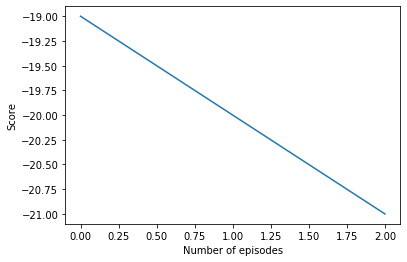

In [7]:
###get statistical results

plt.plot(G_array)
plt.xlabel('Number of episodes')
plt.ylabel('Score')
plt.show()

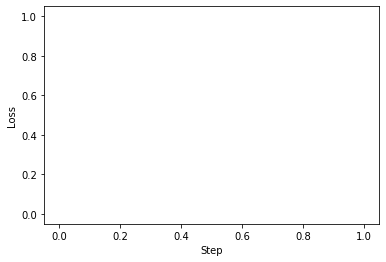

In [8]:
plt.plot(loss_array)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

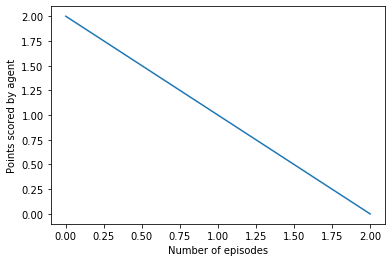

In [9]:
plt.plot(agent_points_array)
plt.xlabel('Number of episodes')
plt.ylabel('Points scored by agent')
plt.show()

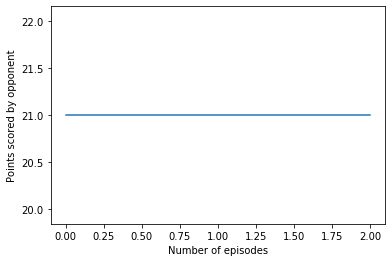

In [10]:
plt.plot(opponent_points_array)
plt.xlabel('Number of episodes')
plt.ylabel('Points scored by opponent')
plt.show()

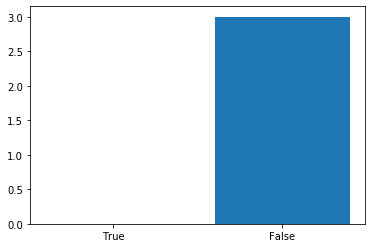

In [11]:
won_array_plot = [0, 0]
for won in won_array:
    if won: won_array_plot[0] += 1
    else: won_array_plot[1] += 1
plt.plot()
plt.bar(['True', 'False'], won_array_plot)
plt.show()

In [12]:
###test model

with tf.Session() as sess:
    saver.restore(sess, './models/DQNmodel.ckpt')
    for episode in range(5):
        observation = env.reset()
        observation = main_agent.preprocess(observation)
        G = 0
        while True:
            env.render()
            action = main_agent.act(observation)
            new_observation, reward, done, info = env.step(action)
            new_observation = main_agent.preprocess(new_observation)
            observation = new_observation
            G += reward
            time.sleep(0.025)
            if done:
                print('Episode', episode+1)
                print('\tScore:', G, '\n')
                break

W0819 13:33:13.032064 4660225472 deprecation.py:323] From /Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key conv2d/kernel not found in checkpoint
	 [[node save/RestoreV2 (defined at <ipython-input-6-90dc33dc615e>:12) ]]

Original stack trace for 'save/RestoreV2':
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/usr/local/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.7/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/usr/local/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/usr/local/lib/python3.7/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/usr/local/lib/python3.7/site-packages/tornado/gen.py", line 708, in __init__
    self.run()
  File "/usr/local/lib/python3.7/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-90dc33dc615e>", line 12, in <module>
    saver = tf.train.Saver()
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 825, in __init__
    self.build()
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 837, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 875, in _build
    build_restore=build_restore)
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 508, in _build_internal
    restore_sequentially, reshape)
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 328, in _AddRestoreOps
    restore_sequentially)
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 575, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1696, in restore_v2
    name=name)
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/Users/wlee2019/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
